In [ ]:
# Exploratory Data Analysis of Olympic Athlete Data

This project will explore the historical data of 
Olympic athletes and their events.

Author: Nicole Hansen
Date:  02/08/2024

In [2]:
# Import Standard Libraries
import pathlib
import sqlite3
import statistics

In [3]:
# Import External Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import jupyterlab
import pyarrow

In [ ]:
# Query to create data set to explore
conn = sqlite3.connect('olympics.db')

data_source = pd.read_sql(
    'SELECT ID as athlete_id, Name as athlete_name, Sex as gender, age, team, athletes.noc, games, year, season, city, sport, event, medal,region FROM athletes INNER JOIN countries ON athletes.noc = countries.noc', 
    conn, index_col=['athlete_id'])

# print(data_source.head())

# Initial Data Inspection

In [13]:
print(data_source.shape)
print(data_source.describe())

(270767, 13)
                 Age           Year
count  261305.000000  270767.000000
mean       25.559783    1978.362297
std         6.392501      29.884637
min        10.000000    1896.000000
25%        21.000000    1960.000000
50%        24.000000    1988.000000
75%        28.000000    2002.000000
max        97.000000    2016.000000


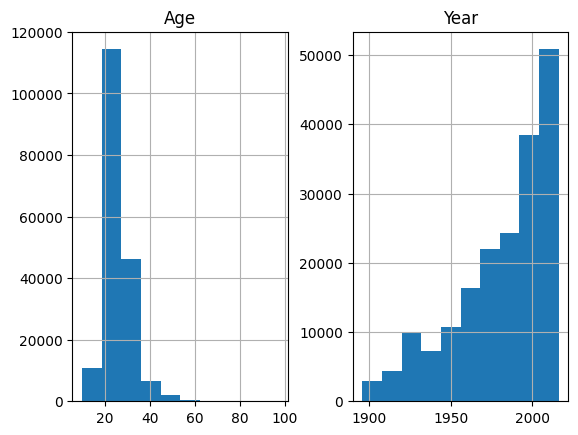

In [21]:
# Initial Plots
df = pd.read_sql(
    'SELECT DISTINCT ID as athlete_id, Sex as gender, age, region, year, season FROM athletes INNER JOIN countries ON athletes.noc = countries.noc', 
    conn, index_col=['athlete_id'])

# print(plot_source.head())

df.hist()
plt.show()

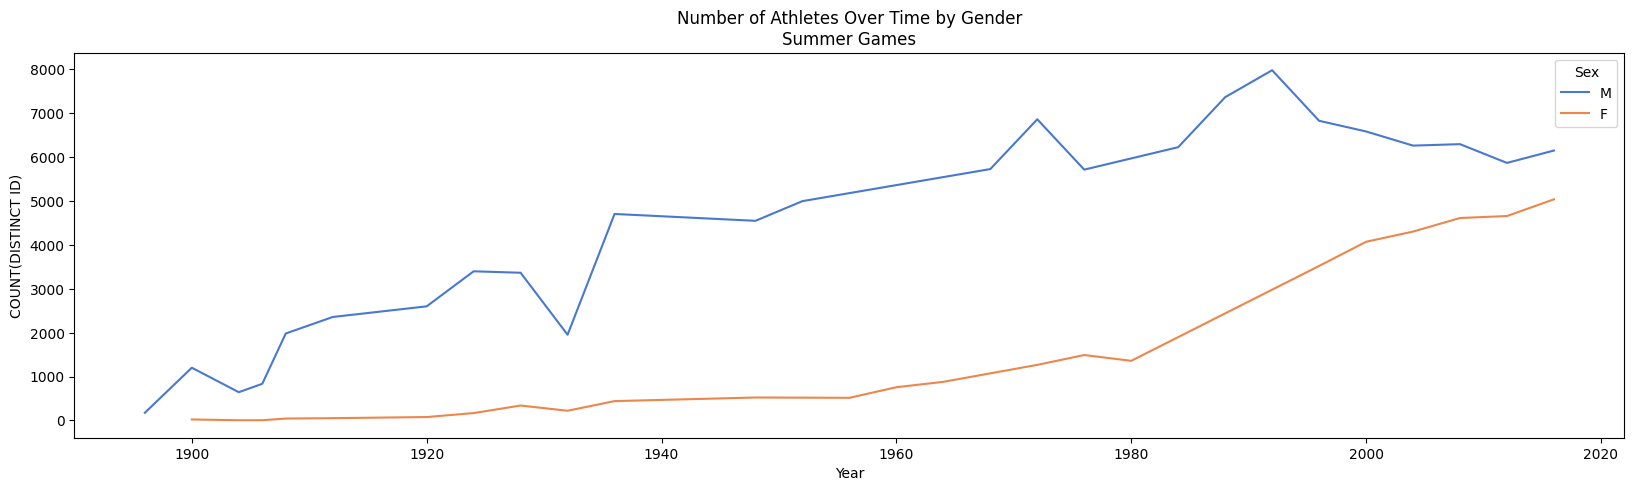

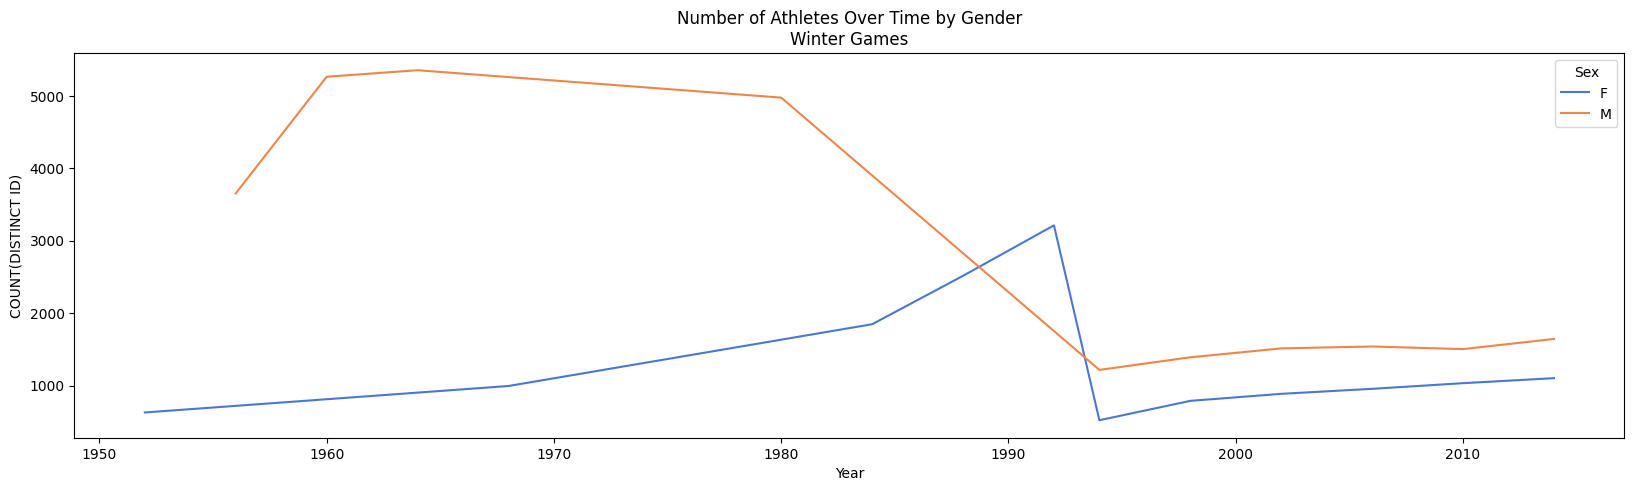

In [75]:
query = '''SELECT year, Sex, COUNT(DISTINCT ID)
FROM athletes
GROUP BY year, Sex
HAVING Season='Summer'
'''

df = pd.read_sql(query, conn)
# print(df.head)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df,
             x='Year',
             y='COUNT(DISTINCT ID)',
             hue='Sex',
             palette='muted'
             )

plt.title("Number of Athletes Over Time by Gender\nSummer Games")
plt.show()


query = '''SELECT year, Sex, COUNT(DISTINCT ID)
FROM athletes
GROUP BY year, Sex
HAVING Season='Winter'
'''

df = pd.read_sql(query, conn)
# print(df.head)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df,
             x='Year',
             y='COUNT(DISTINCT ID)',
             hue='Sex',
             palette='muted'
             )

plt.title("Number of Athletes Over Time by Gender\nWinter Games")
plt.show()


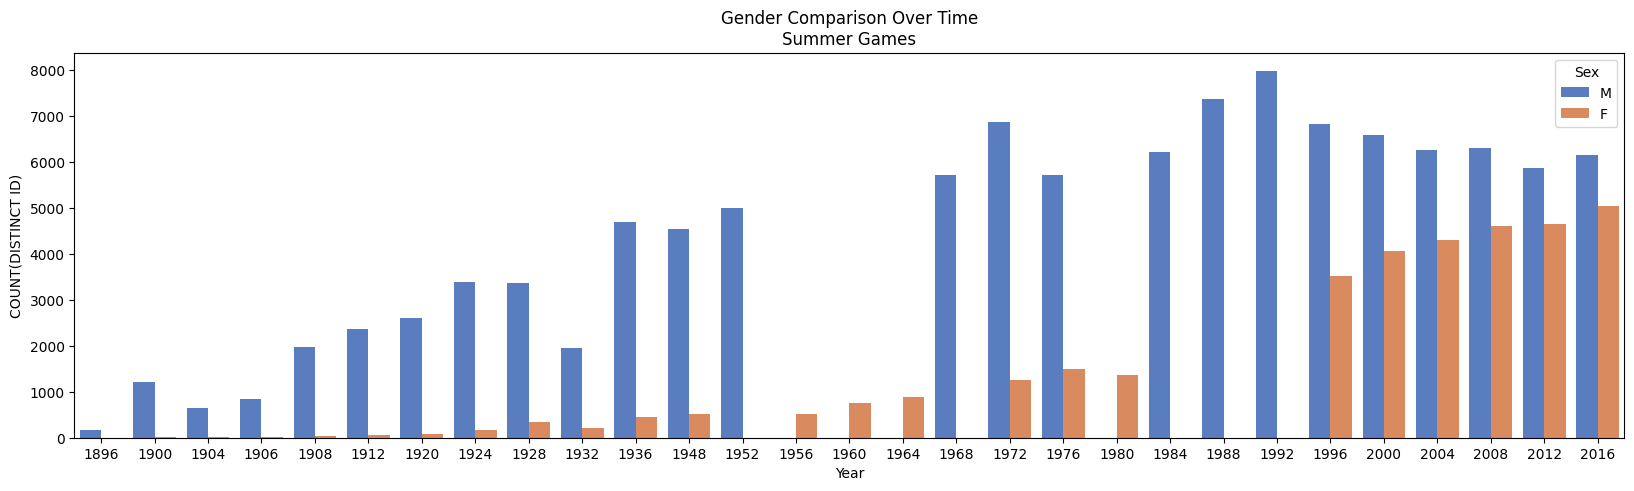

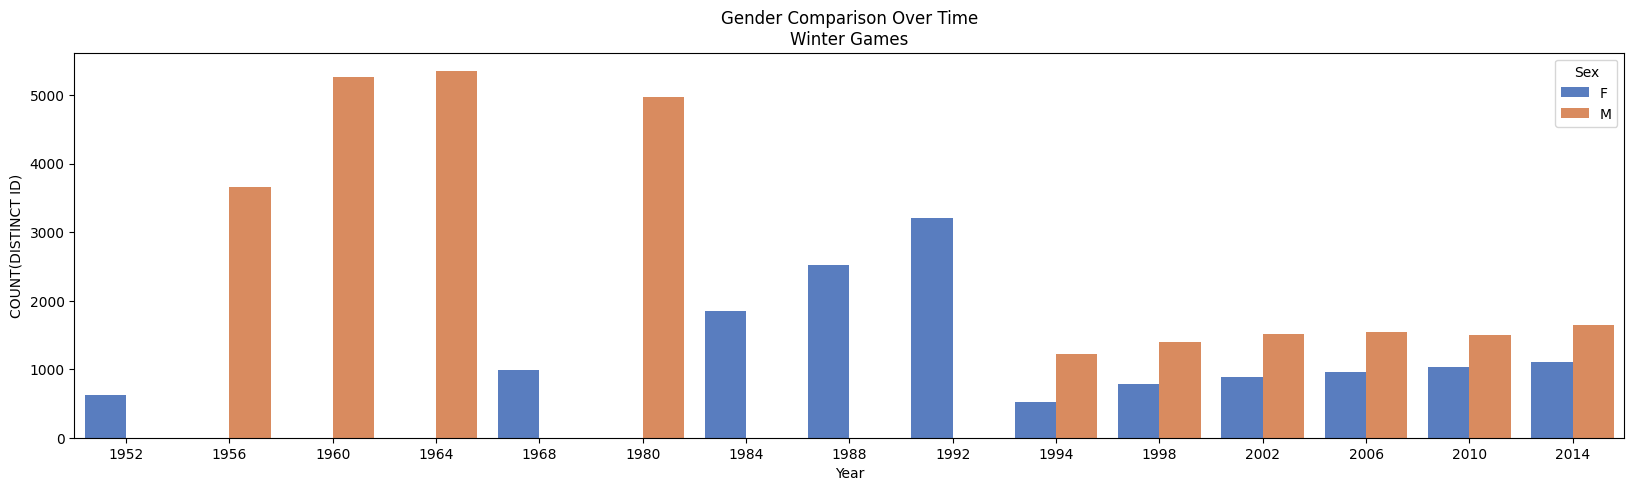

In [76]:
query = '''SELECT year, Sex, COUNT(DISTINCT ID)
FROM athletes
GROUP BY year, Sex
HAVING Season='Summer'
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='Year',
            y='COUNT(DISTINCT ID)',
            hue='Sex',
            palette='muted'
            )
plt.title("Gender Comparison Over Time\nSummer Games")
plt.show()

query = '''SELECT year, Sex, COUNT(DISTINCT ID)
FROM athletes
GROUP BY year, Sex
HAVING Season='Winter'
'''

df = pd.read_sql(query, conn)
plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='Year',
            y='COUNT(DISTINCT ID)',
            hue='Sex',
            palette='muted'
            )
plt.title("Gender Comparison Over Time\nWinter Games")
plt.show()

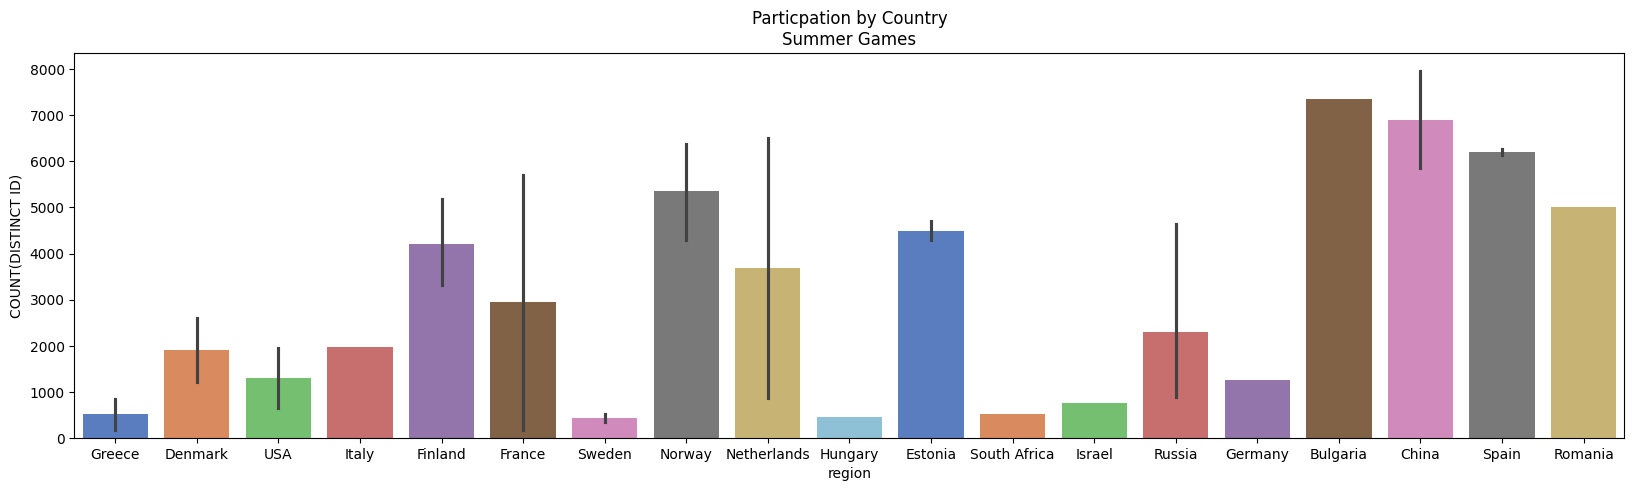

In [80]:
query = '''SELECT year, region, COUNT(DISTINCT ID)
FROM athletes INNER JOIN countries on athletes.noc = countries.noc
GROUP BY year, Sex
HAVING Season='Summer' AND (COUNT(DISTINCT ID)>150)
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='region',
            y='COUNT(DISTINCT ID)',
            hue='region',
            palette='muted'
            )
plt.title("Participation by Country\nSummer Games")
plt.show()